# Initial Notes about Musical Visuals

Code from: https://www.33rdsquare.com/visualizing-sounds-librosa/

To put audio over: https://docs.manim.community/en/stable/guides/add_voiceovers.html. This is only for AI generated speech but we can see..

In [1]:
import librosa
import numpy as np
import pandas as pd
from preview_request import preview_request as pr

In [2]:
audio_file = pr()  # This will call the function from preview.py

if audio_file:
    print(f"Preview saved at: {audio_file}")
else:
    print("No preview was saved.")

y, sr = librosa.load(audio_file)

Enter a song title:  halloween


Searching for: halloween
Preview saved at: Last Relapse_HalloWeen LoFi_preview.wav


In [21]:
y

array([-1.3642421e-12,  4.2064130e-12,  6.8212103e-12, ...,
       -3.8660741e-01, -4.2361158e-01, -4.7379780e-01], dtype=float32)

In [22]:
y.shape

(661248,)

In [23]:
sr

22050

In [24]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
tempo

array([112.34714674])

Let's check: https://tunebat.com/Info/Here-Comes-The-Sun-Remastered-2009-The-Beatles/6dGnYIeXmHdcikdzNNDMm2

This gives the time stamps for every time there is a "beat event"

In [25]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([ 0.09287982,  0.69659864,  1.2306576 ,  1.76471655,  2.29877551,
        2.83283447,  3.36689342,  3.87773243,  4.41179138,  4.94585034,
        5.4799093 ,  6.01396825,  6.54802721,  7.08208617,  7.61614512,
        8.12698413,  8.66104308,  9.19510204,  9.729161  , 10.26321995,
       10.79727891, 11.30811791, 11.84217687, 12.37623583, 12.91029478,
       13.44435374, 13.9784127 , 14.51247166, 15.04653061, 15.58058957,
       16.11464853, 16.64870748, 17.15954649, 17.69360544, 18.2276644 ,
       18.76172336, 19.29578231, 19.82984127, 20.36390023, 20.89795918,
       21.40879819, 21.94285714, 22.4769161 , 23.01097506, 23.54503401,
       24.05587302, 24.58993197, 25.12399093, 25.65804989, 26.19210884,
       26.7261678 , 27.26022676, 27.79428571, 28.30512472, 28.83918367,
       29.37324263, 29.90730159])

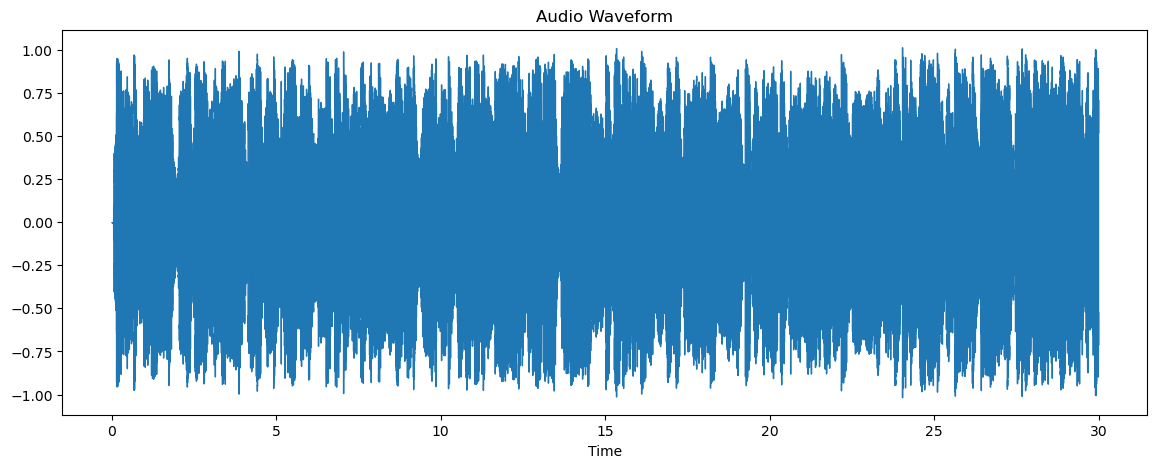

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.show()

In [27]:
y_harm, y_perc = librosa.effects.hpss(y)

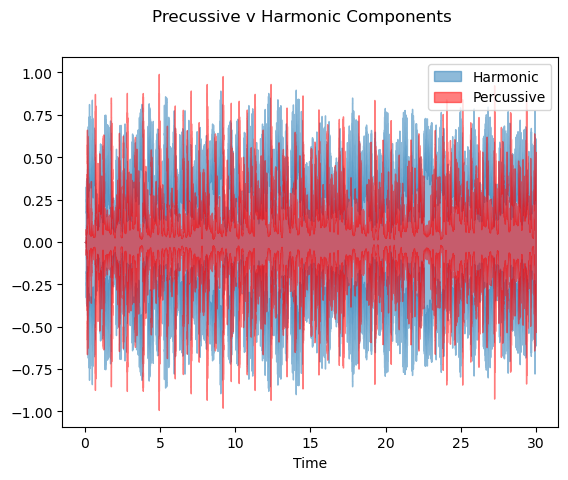

In [28]:
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, label='Percussive')
plt.legend()
plt.suptitle("Precussive v Harmonic Components");

In [29]:
from IPython.display import Audio

In [30]:
Audio(data=y_perc, rate=sr)

In [31]:
Audio(data=y_harm, rate=sr)

In [32]:
Audio(data=y_perc+y_harm,rate=sr)

## Graphs

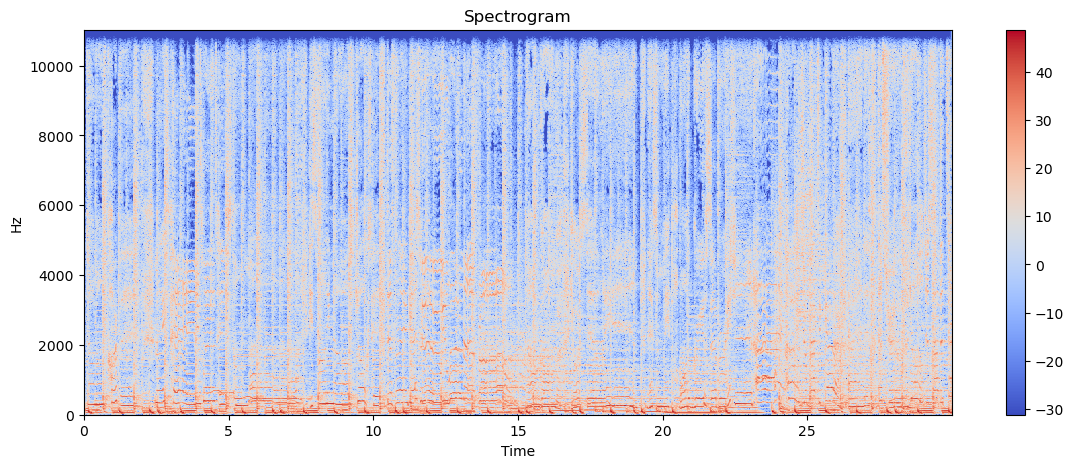

In [33]:
spectrogram = librosa.stft(y) 
S_db = librosa.amplitude_to_db(abs(spectrogram))

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.show()

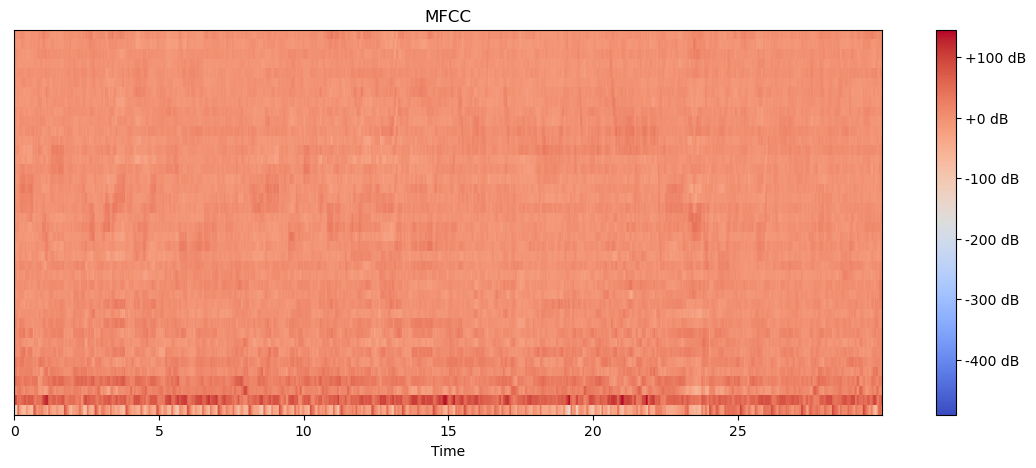

In [34]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

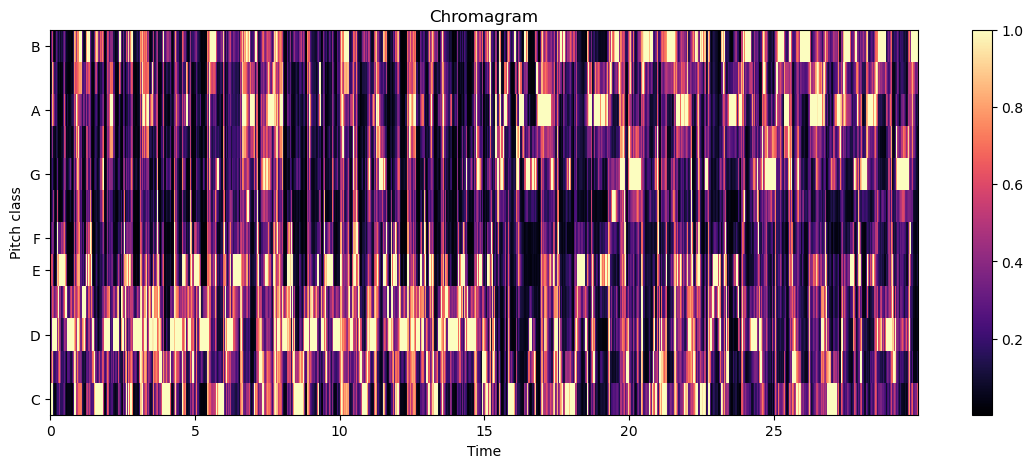

In [17]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr) 

plt.figure(figsize=(14, 5)) 
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

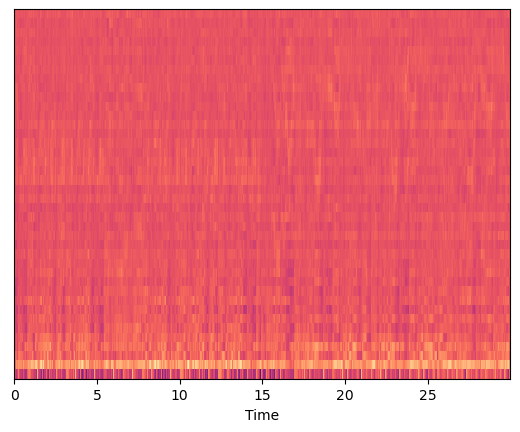

In [18]:
librosa.display.specshow(mfccs, x_axis='time', cmap='magma')